***Reference:***<br>
***Raschka, Sebastian; Liu, Yuxi (Hayden); Mirjalili, Vahid. Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt Publishing.*** 

# ***<u>Chapter 3</u>***

## ***A Tour of Machine Learning Classifiers Using Scikit-Learn***

### ***Perceptron using Scikit-Learn***

#### Loading the dataset

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2,3]] # Assigning petal leangth & petal width as feature matrix
y = iris.target

print("Class Labels:", np.unique(y))

Class Labels: [0 1 2]


In [2]:
iris.target_names, iris.feature_names, len(iris.data)

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 150)

#### Splitting into train test split

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

# stratify 

- Lastly, we took advantage of the built-in support for stratification via **stratify=y**.<br>***In this context, stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.***

In [4]:
# this is what stratify does

print("Label counts in y:", np.bincount((y)))
print("Label counts in y_test:", np.bincount((y_test)))
print("Label counts in y_train:", np.bincount((y_train)))

Label counts in y: [50 50 50]
Label counts in y_test: [15 15 15]
Label counts in y_train: [35 35 35]


#### feature scaling - Standard Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train) 

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

- fit method calculates the estimated parameters, $\mu$(mean) and $\sigma$(std_dev), for each feature dimension from the training data. and by by calling tranform we standardize the dataset.

- **Note that we used the same scaling parameters to standardize the test dataset so that both the values in the training and test dataset are comparable with one another.**

- *Above way of doing scaling is the right way, i.e. using the mean and std_dev of the train dataset to standardize the test dataset too.*
<a href="https://datascience.stackexchange.com/questions/39932/feature-scaling-both-training-and-test-data">**READ MORE!**</a>

#### Applying perceptron

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.01, random_state=1)

In [7]:
y_pred = ppn.predict(X_test_std)

print("Misclassified examples:%d"%(y_test!=y_pred).sum())

Misclassified examples:2


The Perceptron misclassifies 2 out of 45 flower examples. Thus misclassification error = $\frac{2}{45} = 0.044$(4.4%), i.e the accuracy = 1 - error = 1-0.044 = 0.956 (95.6%)

In [8]:
from sklearn.metrics import accuracy_score

print('Accuracy:%.3f'%accuracy_score(y_test, y_pred))

Accuracy:0.956


Alternatively, each classifier in scikit-learn has a score method, which computes a classifier’s prediction accuracy by combining the predict call with accuracy_score, as shown here:

In [9]:
print('Accuracy:%.3f'%ppn.score(X_test_std, y_test))

Accuracy:0.956


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')      

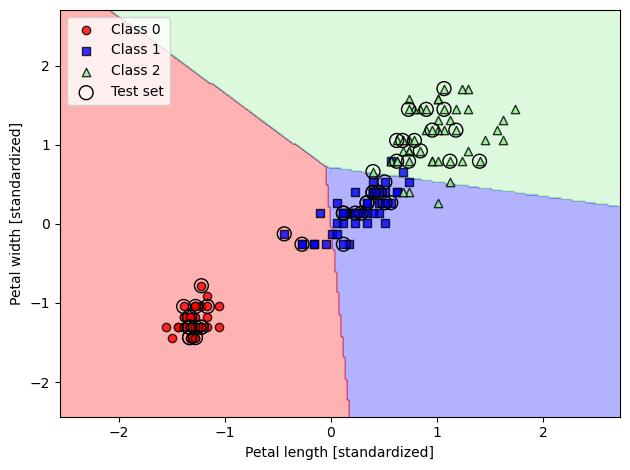

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show();

As we see, the three flowers can't be classified by a linear decison boundary.

However, remember from our discussion in Chapter 2 that the perceptron algorithm never converges on datasets that aren’t perfectly linearly separable, which is why the use of the perceptron algorithm is typically not recommended in practice. In the following sections, we will look at more powerful linear classifiers that converge to a loss minimum even if the classes are not perfectly linearly separable.

## ***Logistic Regression***

- $\text{Odds in favour} = \frac{p}{1-p}$where $p$ stands for *probability* of the positive event.


- The term **“positive event”** refers to the event that we want to predict, for example, the probability that a patient has a certain disease given certain symptoms;<br> *we can think of the positive event as class label y = 1 and the symptoms as features x.* Hence, for brevity, we can define the probability p as $p := p(y = 1|x)$, the conditional probability that a particular example belongs to a certain class 1 given its features, x.


- **logit function(log-odds):**(natural logarithm) - The logit function takes input values in the range 0 to 1 and transforms them into values over the entire real-number range.<br> $logit(p) = log\frac{p}{1-p}$ 

- Under the logistic model, we assume that there is a linear relationship b/w the weighted inputs and the log-odds<br>$logit(p) = w^Tx + b$

- While the logit function maps the probability to a real-number range, we can consider the inverse of this function to map the real-number range back to a [0, 1] range for the probability p.<br>The inverse of **logit function** is called **logistic sigmoid function/ Sigmoid function**<br>$$\sigma(z) = \frac{1}{1+e^{-z}}$$ $z = w^Tx + b$

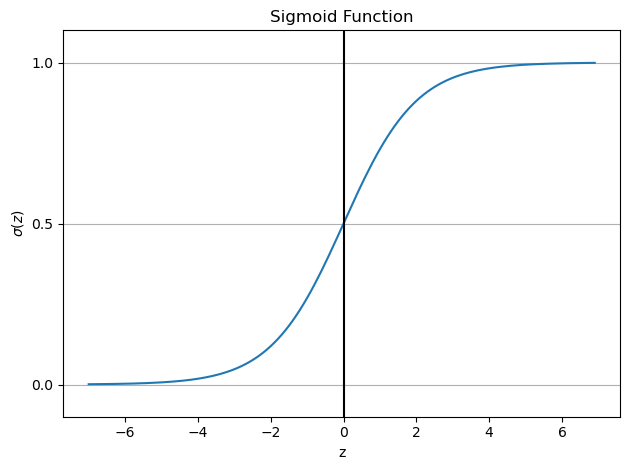

In [12]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.title("Sigmoid Function")
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('figures/03_02.png', dpi=300)
plt.show();

- **To build some understanding of the logistic regression model, we can relate it to Chapter 2. In Adaline, we used the identity function, as the activation function. In logistic regression, this activation function simply becomes the sigmoid function that we defined earlier.**

- ***The output of sigmoid function is interpreted as the probability of a particular example belonging to class 1, $$\sigma(z) = p(y=1|x;w,b)$$ given its features, x, and parameterized by the weights and bias, w and b.***

- The predicted prob. can then simply be converted into a binary outcome via a **threshold function:**<br>$$\hat{y} = \left\{
\begin{array}{ll}
1 & \mbox{if $\sigma(z) \geq$ 0.5}\\
0 & \mbox{otherwise}
\end{array}
\right.$$

- If we look at the plot of the sigmoid function, this is equivalent to the following:<br>$$\hat{y} = \left\{
\begin{array}{ll}
1 & \mbox{if $z \geq$ 0.0}\\
0 & \mbox{otherwise}
\end{array}
\right.$$

- In fact, there are many applications where we are not only interested in the predicted class labels, but where the estimation of the class-membership probability is particularly useful (the output of the sigmoid function prior to applying the threshold function).

### ***Loss function for Logistic Regression***

- We define **likehood function** which is basically combined probability given by sigmoid function for all data-points.<br>The formula is:<br>$$L(w, b|x) = p(y|x;w,b) = \prod_{i=1}^{n}p\left(y^{(i)}|x^{(i)};w,b\right) = \prod_{i=1}^{n}\left(\sigma(z^{(i)})\right)^{y^{(i)}} \left(1 - \sigma(z^{(i)})\right)^{1 - y^{(i)}}$$

- **We want to maximize it when we build a logistic regession model.**<br>Taking log is a easier way to do so,<br>**log-likelihood function:**<br>$$l(w, b|x) = \sum_{i=1}^{n}\left[y^{(i)}log(\sigma(z^{(i)})) + (1 - y^{(i)})log(1 - \sigma(z^{(i)}))\right]$$

- We can use Gradient Ascent on this or **Gradient Descent** by using **-ve log-likelihood function:**<br>$$L(w, b|x) = \frac{1}{n}\sum_{i=1}^{n}\left[-y^{i}log(\sigma(z^{i})) - (1 - y^{i})log(1 - \sigma(z^{i}))\right]$$n is just a scaling factor

In [13]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

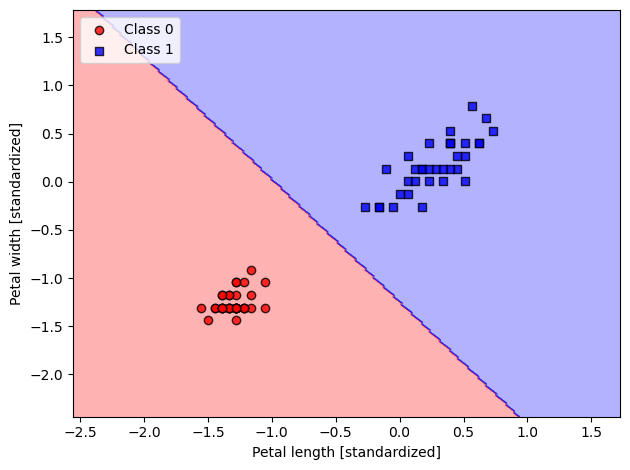

In [14]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_05.png', dpi=300)
plt.show();

### ***Training a Logistic Regression model with scikit-learn***

### ***The OvA/OvR method for multi-class classification*** 

- **OvA, which is sometimes also called one-versus-rest (OvR)**, *is a technique that allows us to extend any binary classifier to multi-class problems.*

- Using OvA, we can train one classifier per class, where the particular class is treated as the positive class and the examples from all other classes are considered negative classes. 

- If we were to classify a new, unlabeled data instance, we would use our n classifiers, where n is the number of class labels, and assign the class label with the highest confidence to the particular instance we want to classify.

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100, solver='lbfgs', multi_class='ovr')

lr.fit(X_train_std, y_train)

LogisticRegression(C=100, multi_class='ovr')

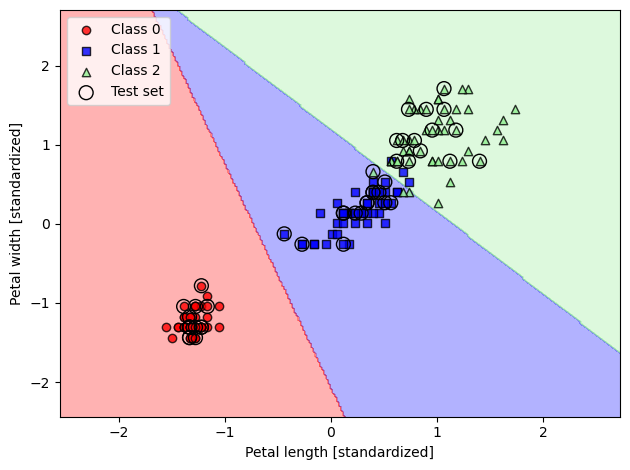

In [16]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_06.png', dpi=300)
plt.show();

### Algorithms for convex optimization 

- Note that there exist many different algorithms for solving optimization problems. For minimizing convex loss functions, such as the logistic regression loss, it is recommended to use more advanced approaches than regular stochastic gradient descent (SGD). 

- In fact, scikit-learn implements a whole range of such optimization algorithms, which can be specified via the solver parameter, namely, 'newton-cg', 'lbfgs', 'liblinear', 'sag', and 'saga'.

- While the logistic regression loss is convex, most optimization algorithms should converge to the global loss minimum with ease. However, there are certain advantages of using one algorithm over the other. 

- For example, in previous versions (for instance, v 0.21), scikit-learn used 'liblinear' as a default, which cannot handle the multinomial loss and is limited to the OvR scheme for multiclass classification. However, in scikit-learn v 0.22, the default solver was changed to 'lbfgs', which stands for the limited-memory Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm (https://en.wikipedia.org/wiki/Limited-memory_BFGS) and is more flexible in this regard.

In [17]:
# The probability that training examples belong to a certain class 
# can be computed using the predict_proba method. 
# For example, 
# we can predict the probabilities of the first three examples in the
# test dataset as follows:

print(lr.predict_proba(X_test_std[:3,:]))

# The first row corresponds to the class membership probabilities of the 
# first flower, the second row corresponds to the class membership probabilities of the second flower, 
# and so forth. 
# Notice that the column-wise sum in each row is 1, as expected.
# You can confirm this by executing 
print(lr.predict_proba(X_test_std[:3, :]).sum(axis=1))

[[3.81527885e-09 1.44792866e-01 8.55207131e-01]
 [8.34020679e-01 1.65979321e-01 3.25737138e-13]
 [8.48831425e-01 1.51168575e-01 2.62277619e-14]]
[1. 1. 1.]


In [18]:
# The highest value in the first row is approximately 0.85, which means that
# the first example belongs to class 3 (Iris-virginica) with a 
# predicted probability of 85 percent. So, as you may have already noticed, we can get
# the predicted class labels by identifying the largest column in each row, 

# for example, using NumPy’s argmax function: 

print(lr.predict_proba(X_test_std[:3, :]).argmax(axis=1) )

# The returned class indices are shown here (they correspond to Iris-virginica, Iris-setosa, and Iris-setosa)

# In the preceding code example, we computed the conditional probabilities 
# and converted these into class labels manually by using NumPy’s argmax 
# function. In practice, the more convenient way of obtaining class labels 
# when using scikit-learn is to call the predict method directly
 
print(lr.predict(X_test_std[:3,:]))

[2 0 0]
[2 0 0]


In [19]:
# Lastly, a word of caution if you want to predict the class label of a 
# single flower example: scikit-learn expects a two-dimensional array as 
# data input; thus, we have to convert a single row slice into such a 
# format first. One way to convert a single row entry into a 
# two-dimensional data array is to use NumPy’s reshape method to add a new 
# dimension, as demonstrated here:


lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

### ***Tackling overfitting via Regularization***

- Overfitting is a common problem in machine learning, where a model performs well on training data but does not generalize well to unseen data (test data). 

- *If a model suffers from* ***overfitting***, we also say that the model has a ***high variance***, **which can be caused by having too many parameters**, *leading to a model that is too complex given the underlying data.* 

- *Similarly, our model can also suffer from* ***underfitting (high bias)****, which means that our model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance on unseen data.*

![overfitting](Images/overfitting.png)

### ***Bias-Variance TradeOff***

- What does "high variance" or "high bias" mean?

- ***In general, we might say that “high variance” is proportional to overfitting and “high bias” is proportional to underfitting.***

- In the context of machine learning models, 
    - ***Variance measures the consistency (or variability) of the model prediction for classifying a particular example if we retrain the model multiple times, for example, on different subsets of the training dataset. We can say that the model is sensitive to the randomness in the training data.***
    
    
    - ***In contrast, bias measures how far off the predictions are from the correct values in general if we rebuild the model multiple times on different training datasets; bias is the measure of the systematic error that is not due to randomness.***
    
<div>
<img src="Images/bias_var.png" style="width: 400px;"/>
</div>

- Difference between Accurate and Precise
    - Accuracy and precision are both forms of measurement that define how close you are to hitting a target or achieving a goal. **Accuracy evaluates how close you are to the true value of the measurement, while precision shows how close the measured values are to one another.**

### ***Regularization***

- *One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization.*

- ***Regularization is a very useful method for handling collinearity (high correlation among features), filtering out noise from data, and eventually preventing overfitting.*** 

- ***Why Regularization?***<br>*When we we have too many features. To avoid the regundent features we use a Regulalizer. A Regulalizer tends to reduce the weights of the different features.*

- ***<u>Regularization and feature normalization</u>***<br> *Regularization is another reason why feature scaling such as standardization is important.* **For regularization to work properly, we need to ensure that all our features are on comparable scales.**

- 2 types of Regularization:
    - **L2-Regularization(Ridge)**
    - **L1-Regularization(Lasso)**
<br></br>
- When we have too many features:
    - L1-Regularization tends to push the weights to zero in case there are redundant features. That's why it's called **Selection Operator**
    
    - L2-Regularization tends to minimize the weights of the features(not necessarily make it zero).
    
- When most of the features are redundent:
    - Ridge will choose those features that have least weight.
    - Lasso should be used in such case.


- Both Ridge & Lasso are **Shrinkage Operators**, however, only Lasso is a **Selection Operator**.

- The most common form of regularization is so-called L2 regularization (sometimes also called L2 shrinkage or weight decay), which can be written as follows:$$\frac{\lambda}{2n}||w||^2 = \frac{\lambda}{2n}\sum_{j=1}^{m}w_{j}^{2}$$ Here $\lambda$ is called **regularization parameter**<br>'2' and 'n' are just scaling factors.


- *The Loss function for logistic regression can be regularized by adding a simple regularization term,* **which will shrink the weights during model training:**$$L(w, b|x) = \frac{1}{n}\sum_{i=1}^{n}\left[-y^{i}log(\sigma(z^{i})) - (1 - y^{i})log(1 - \sigma(z^{i}))\right] + \frac{\lambda}{2n}||w||^2$$ and now we can apply gradient descent on this.


- ***Via the regularization parameter,$\lambda$, we can then control how closely we fit the training data, while keeping the weights small. By increasing the value of $\lambda$, we increase the regularization strength.*** 

- Please note that the bias unit, which is essentially an intercept term or negative threshold, as we learned in Chapter 2, is usually not regularized. 

- **The parameter, C, that is implemented for the LogisticRegression class in scikit-learn comes from a convention in SVM. $$C\propto\frac{1}{\lambda}$$Consequently, decreasing the value of the inverse regularization parameter,$C$, means that we are increasing the regularization strength**, which we can visualize by plotting the L2 regularization path for the two weight coefficients:

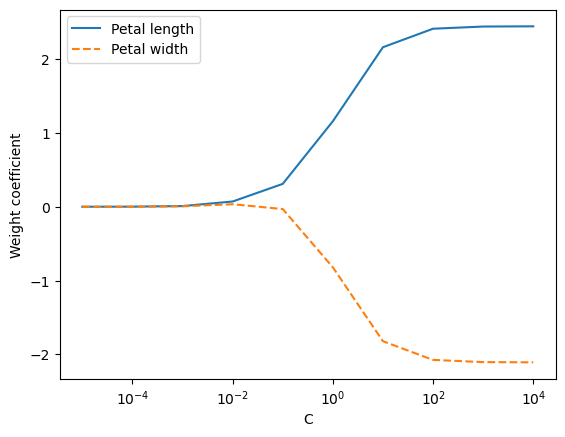

In [20]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c,
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('figures/03_08.png', dpi=300)
plt.show();

- As we can see in the resulting plot, **the weight coefficients shrink if we decrease parameter C, i.e., if we increase the regularization strength.**

- ***Increasing the regularization strength can reduce overfitting***,<br> so we might ask,<br>**Why we don’t strongly regularize all models by default ?**

&emsp;&emsp; *The reason is that we have to be careful when adjusting the regularization strength. For instance, if the regularization strength is too high and the weights coefficients approach zero, the model can perform very poorly due to underfitting.*

## ***Support Vector Machine(SVM)***

- SVM can be considered an extension of Perceptron. Using the Perceptron algo., we minimized miss-classification error. ***However in SVMs, our optimization objective is to maximize the margin.***

- **The <u>margin</u> is defined as the distance b/w the separating hyperplanes(decision boundary) and the training examples that are closest to this hyperplane, which are so-called <u>support vectors</u>.**


![svm](Images\svm.png)

- **The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error, whereas models with small margins are more prone to overfitting.**

### ***Soft-Margin SVM/Classification***
***Dealing with Nonlinearly Separable Case using Slack Variables***
    
- The motivation for introducing the slack variable was that the linear constraints in the SVM optimization objective need to be relaxed for nonlinearly separable data to allow the convergence of the optimization in the presence of misclassifications, under appropriate loss penalization.
<br>    

- The use of the slack variable, in turn, introduces the variable, which is commonly referred to as C in SVM contexts. ***We can consider C as a hyperparameter for controlling the penalty for misclassification.***
    - *Large values of C correspond to large error penalties,* 
    - *whereas we are less strict about misclassification errors if we choose smaller values for C.*
<br>
</br>
- ***We can then use the C parameter to control the width of the margin and therefore tune the bias-variance tradeoff***, as illustrated

    <div>
    <img src="Images\svm_c.png" style="width: 500px;"/>
    </div>
    
    
- This concept is related to regularization, which we discussed in the previous section in the context of regularized regression, where decreasing the value of C increases the bias (underfitting) and lowers the variance (overfitting) of the model.

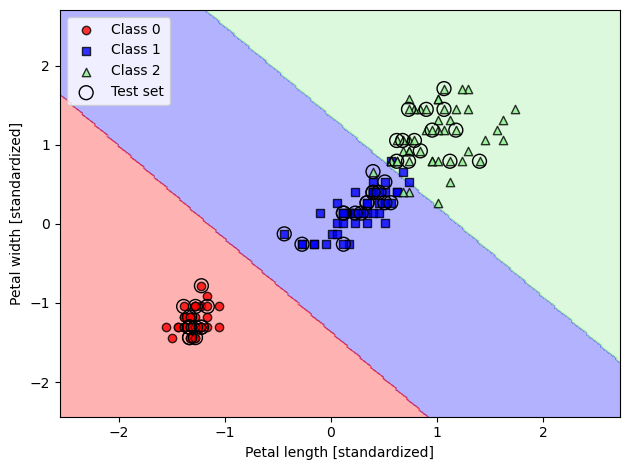

In [21]:
# linear SVM

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)


plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show();

### **Logistic Regression v/s SVM**

- In practical classification tasks, linear logistic regression and linear SVMs often yield very similar results. 

- ***Logistic regression tries to maximize the conditional likelihoods of the training data, which makes it more prone to outliers than SVMs, which mostly care about the points that are closest to the decision boundary (support vectors).*** 

- Furthermore, logistic regression models can be easily updated, which is attractive when working with streaming data.

Alternative implementations in scikit-learn 

The scikit-learn library’s LogisticRegression class, which we used in the previous sections, can make use of the LIBLINEAR library by setting ```solver='liblinear'```. LIBLINEAR is a highly optimized C/C++ library developed at the National Taiwan University (http://www.csie.ntu.edu.tw/~cjlin/liblinear/). 

Similarly, the ```SVC``` class that we used to train an SVM makes use of LIBSVM, which is an equivalent C/C++ library specialized for SVMs (http://www.csie.ntu.edu.tw/~cjlin/libsvm/). 

The advantage of using LIBLINEAR and LIBSVM over, for example, native Python implementations is that they allow the extremely quick training of large amounts of linear classifiers. 


However, sometimes our datasets are too large to fit into computer memory. Thus, scikit-learn also offers alternative implementations via the ```SGDClassifier``` class, which also supports online learning via the ```partial_fit``` method. The concept behind the ```SGDClassifier``` class is similar to the stochastic gradient algorithm that we implemented in Chapter 2 for Adaline. We could initialize the SGD version of the perceptron (```loss='perceptron'```), logistic regression (```loss='log'```), and an SVM with default parameters (```loss='hinge'```), as follows:

In [22]:
# from sklearn.linear_model import SGDClassifier

# ppn = SGDClassifier(loss='perceptron')
# lr = SGDClassifier(loss='log')
# svm = SGDClassifier(loss='hinge')

### A non-linearly separable data

Obviously, we would not be able to separate the examples from the positive and negative class very well using a linear hyperplane as a decision boundary via the linear logistic regression or linear SVM model that we discussed in earlier sections.

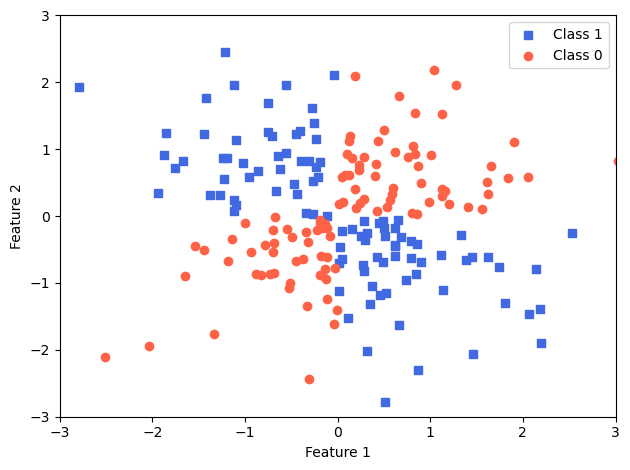

In [23]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_12.png', dpi=300)
plt.show();

### **Kernal SVM**

- **SVMs can easily be kernalized to solve non-linear classification problems.**


- ***The basic idea behind kernel methods for dealing with such linearly inseparable data is to create nonlinear combinations of the original features to project them onto a higher-dimensional space via a mapping function, $\phi$, where the data becomes linearly separable.*** 

- *As shown below, we can transform a 2D-dataset into a new three-dimensional feature space, where the classes become separable via the following projection:*$$\phi(x_1, x_2) = (z_1,z_2,z_3) = (x_1, x_2, x_{1}^2 + x_{2}^2)$$ **This allows us to separate the two classes shown in the plot via a linear hyperplane that becomes a nonlinear decision boundary if we project it back onto the original feature space** *,as illustrated with the following concentric circle dataset:*


![kernel_svm](Images/kernel_svm.png)

#### ***Kernal Function***

- To solve a nonlinear problem using an SVM, we would transform the training data into a higher-dimensional feature space via a mapping function, $\phi$, and train a linear SVM model to classify the data in this new feature space. Then, we could use the same mapping function, $\phi$, to transform new, unseen data to classify it using the linear SVM model. 

- However, one problem with this mapping approach is that the construction of the new features is computationally very expensive, especially if we are dealing with high-dimensional data. This is where the so-called **kernel trick** comes into play.

- We just need to replace the dot product $x^{(i)T}x^{(j)}$ ---> $\phi\left(x^{(i)}\right)^{T} \phi\left(x^{(j)}\right)$


- One of the most widely used kernels is the **radial basis function (RBF) kernel**, also called **Gaussian kernel**:<br><br>$$\kappa \left(x^{(i)}, x^{(j)}\right) = exp\left(-\frac{||x^{(i)} - x^{(j)}||^2}{2\sigma^2}\right)$$<br>This is often simplified to:<br>$$\kappa \left(x^{(i)}, x^{(j)}\right) = exp\left(-\gamma||x^{(i)} - x^{(j)}||^2 \right)$$<br>Here, $\gamma = \frac{1}{2\sigma^2}$ is a free parameter to be optimized.


- ***Roughly speaking, the term “kernel” can be interpreted as a similarity function between a pair of examples.*** *The minus sign inverts the distance measure into a similarity score, and, due to the exponential term, the resulting similarity score will fall into a range between 1 (for exactly similar examples) and 0 (for very dissimilar examples).*

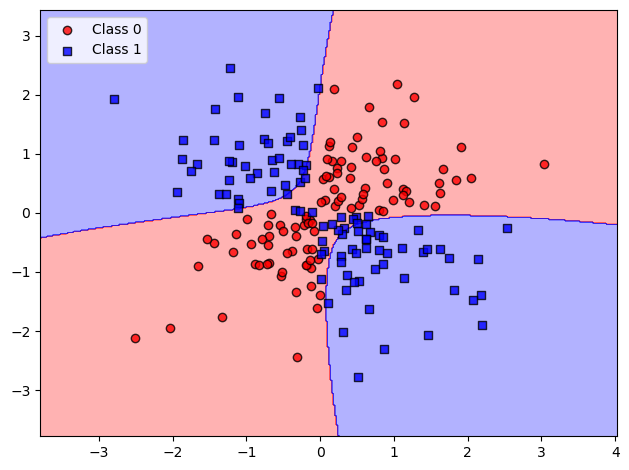

In [24]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10)
svm.fit(X_xor, y_xor)


plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_14.png', dpi=300)
plt.show();

**The $\gamma$ parameter, which we set to gamma=0.1, can be understood as a cut-off parameter for the Gaussian sphere. If we increase the value for $\gamma$, we increase the influence or reach of the training examples, which leads to a tighter and bumpier decision boundary.**

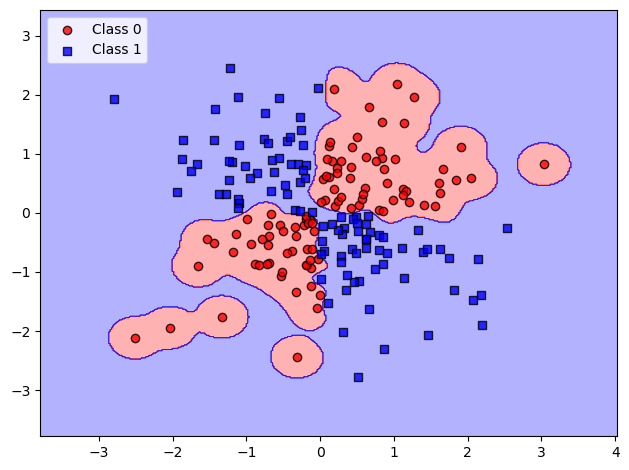

In [25]:
# High gamma

svm = SVC(kernel='rbf', random_state=1, gamma=20, C=10)
svm.fit(X_xor, y_xor)


plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_14.png', dpi=300)
plt.show();

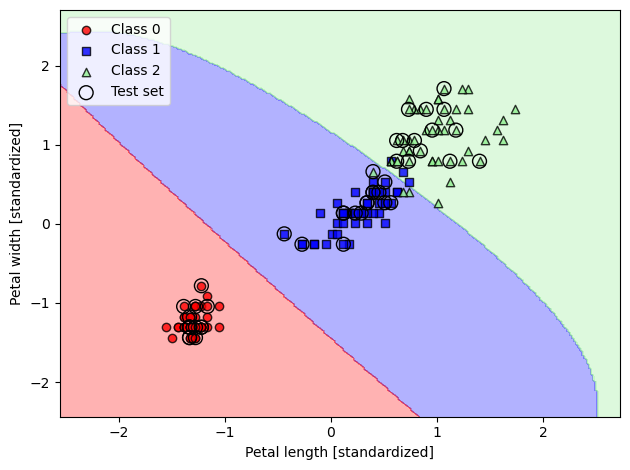

In [26]:
# Applying on iris dataset

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_15.png', dpi=300)
plt.show();

Since we chose a relatively small value for $\gamma$, the resulting decision boundary of the RBF kernel SVM model will be relatively soft, as shown above.


Now, let’s increase the value of $\gamma$ and observe the effect on the decision boundary:

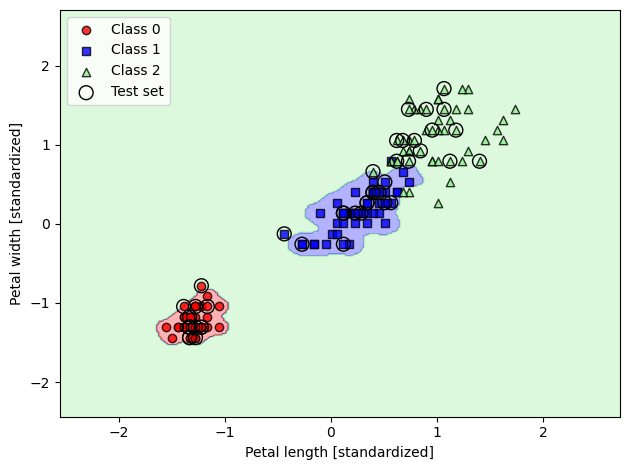

In [27]:
# Applying on iris dataset

svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_15.png', dpi=300)
plt.show();

- ***Above we can now see that the decision boundary around the classes 0 and 1 is much tighter using a relatively large value of $\gamma$.***

- Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data. **This illustrates that the $\gamma$ parameter also plays an important role in controlling overfitting or variance when the algorithm is too sensitive to fluctuations in the training dataset.**


- **Read more about Hyperparameters C & $\gamma$**
    - [Link1](https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167)
    - [Link2](https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be)

## **Decision Tree Learning**

- Decision tree classifiers are attractive models if we care about interpretability. As the name “decision tree” suggests, we can think of this model as breaking down our data by making a decision based on asking a series of questions.<img src="Images/decision_tree.png" width="400"/>


- Based on the features in our training dataset, the decision tree model learns a series of questions to infer the class labels of the examples.


- ***<u>Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest information gain (IG).</u>***


- *In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the training examples at each node all belong to the same class. In practice, this can result in a very deep tree with many nodes, which can easily lead to overfitting. Thus, we typically want to* **prune the tree by setting a limit for the maximum depth of the tree.**

### ***<u>Maximizing Information Gain (IG)</u>***

- **To split the nodes at the most informative features**, we need to define an objective function to optimize via the tree learning algorithm. **Here, our objective function is to maximize the IG at each split**, which we define as follows:$$IG\left(D_p, f\right) = I\left(D_p\right) - \sum_{j=1}^{m}\frac{N_j}{N_p}I\left(D_j\right)$$

- Here:
    - *f* is the feature to perform the split
    - $D_{p}$ and $D_{j}$ are the dataset of the parent and jth child node
    - **I** is **impurity measure**
    - $N_p$ is total no. of training examples at the parent node
    - $N_j$ is same for jth child node
<br>
</br>
    
- As we can see, the **IG** ***— is simply the difference between the impurity of the parent node and the sum of the child node impurities —***<br> **the lower the impurities of the child nodes, the larger the information gain.**


- The decision to split at each node is made according to the metric called purity. A node is 100% impure when a node is split evenly 50/50 and 100% pure when all of its data belongs to a single class. In order to optimize our model we need to reach maximum purity and avoid impurity.


- **For simplicity, most libraries implement binary decision tree. This means that each parent node is split into two child nodes, $D_{left}$ and $D_{right}$ :**

$$\boxed{IG\left(D_p, f\right) = I\left(D_p\right) - \frac{N_{left}}{N_p}I\left(D_{left}\right) - \frac{N_{right}}{N_p}I\left(D_{right}\right)}$$


### *<u>Impurity Measures</u>:*

- 3 impurity measures or splitting criteria that are commonly used in binary decision trees are --
    - **Gini Impurity**$(I_G)$
    - **Entropy**$(I_H)$
    - **Classification Error**$(I_E)$
<br>
</br>


### **<u>Entropy:</u>**


- defining entropy for all **non-empty** classes $\left(p(i|t) \neq 0 \right)$: $$I_H(t) = - \sum_{i=1}^{c}p(i|t) \times log_{2} p(i|t)$$ Here, ***$p(i|t)$ is the proportion of the examples that belong to class i for a particular node, t.***

- **The entropy = 0 if all examples at a node belong to the same class, and** 

- **the entropy is maximal if we have a uniform class distribution.** 

- For example, in a binary class setting, **the entropy is 0 if p(i=1|t) = 1 or p(i=0|t) = 0.**<br> **If the classes are distributed uniformly with p(i=1|t) = p(i=0|t) = 0.5, the entropy is 1.**

- Therefore, we can say that the entropy criterion attempts to maximize the mutual information in the tree.

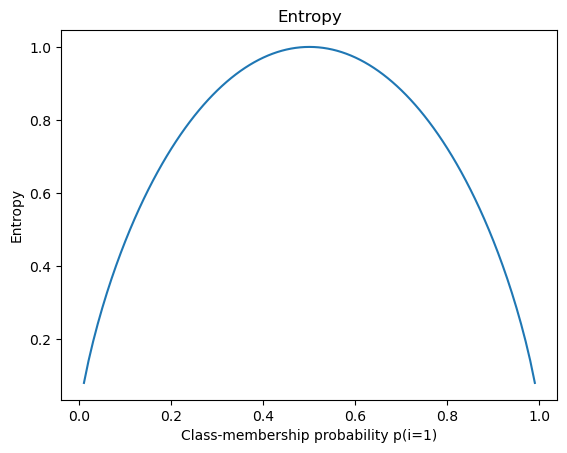

In [28]:
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None 
       for p in x]

plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.title("Entropy")
#plt.savefig('figures/03_26.png', dpi=300)
plt.show();

### **<u>Gini Impurity:</u>**

***The Gini impurity can be understood as a criterion to minimize the probability of misclassification:*** 

$$\boxed{I_G(t) = \sum_{i=1}^{c}p(i|t) \cdot \left(1 - p(i|t)\right) = 1 - \sum_{i=1}^{c}p(i|t)^2}$$

*Similar to entropy, the Gini impurity is maximal if the classes are perfectly mixed*, for example, in a binary class setting $(c = 2)$:$$I_G(t) = \sum_{i=1}^{2}0.5^2 = 0.5$$

**However, in practice, both the Gini impurity and entropy typically yield very similar results**, and it is often not worth spending much time on evaluating trees using different impurity criteria rather than experimenting with different pruning cut-offs. 

### **<u>Classification Error:</u>**

$$I_E(t) = 1 - max\{p(i|t)\}$$

This is a useful criterion for pruning, but not recommended for growing a decision tree, since it is less sensitive to changes in the class probabilities of the nodes. We can illustrate this by looking at the two possible splitting scenarios shown
![c_e](Images/c_e.png)

<table><tr>
<td> <img src="Images/ce_gini.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="Images/entropy.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

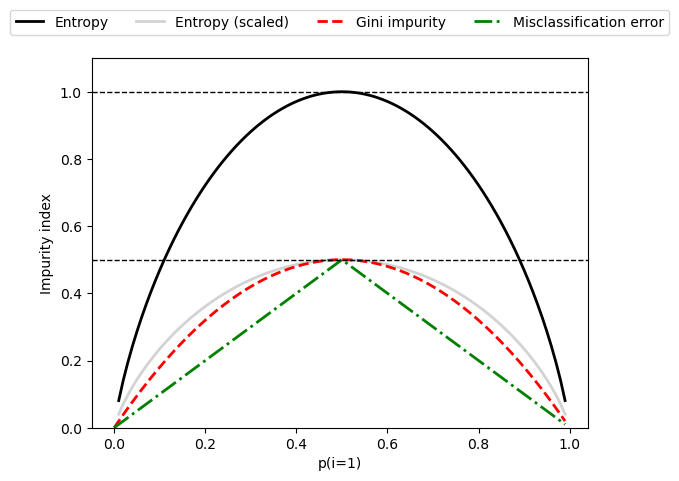

In [29]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
#plt.savefig('figures/03_19.png', dpi=300, bbox_inches='tight')
plt.show();


# We can see below Gini Impurity & Entropy gives us similar results.

### ***Building a decision tree***

***Decision trees can build complex decision boundaries by dividing the feature space into rectangles. However, we have to be careful since the deeper the decision tree, the more complex the decision boundary becomes, which can easily result in overfitting.***

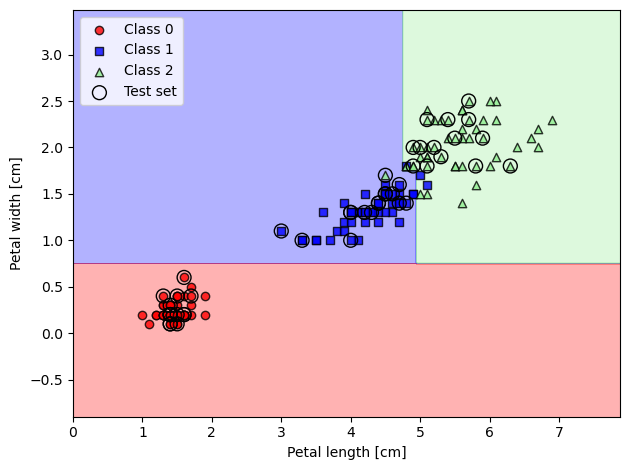

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',
                                   max_depth=4,
                                   random_state=1)

tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_20.png', dpi=300)
plt.show();

In [31]:
# tree_model.predict(X_test)

tree_model.score(X_test, y_test)

0.9777777777777777

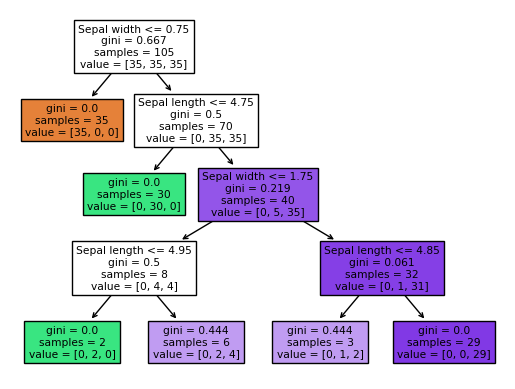

In [32]:
# A nice feature in scikit-learn is that it allows us to readily visualize the 
# decision tree model after training via the following code:

from sklearn import tree

feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']

tree.plot_tree(tree_model,
              feature_names=feature_names,
              filled=True)

plt.show();

Setting ```filled=True``` in the ```plot_tree``` function we called colors the nodes by the majority class label at that node. 

Looking at the decision tree figure, we can now nicely trace back the splits that the decision tree determined from our training dataset. Regarding the feature splitting criterion at each node, note that the branches to the left correspond to “True” and branches to the right correspond to “False.”

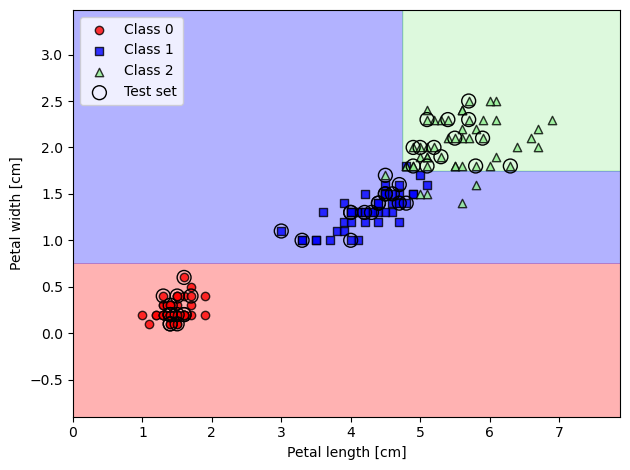

In [33]:
# from sklearn.tree import DecisionTreeClassifier

tree_model1 = DecisionTreeClassifier(criterion='gini',
                                   max_depth=3,
                                   random_state=1)

tree_model1.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model1,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_20.png', dpi=300)
plt.show();

In [34]:
tree_model1.score(X_test, y_test)

0.9777777777777777

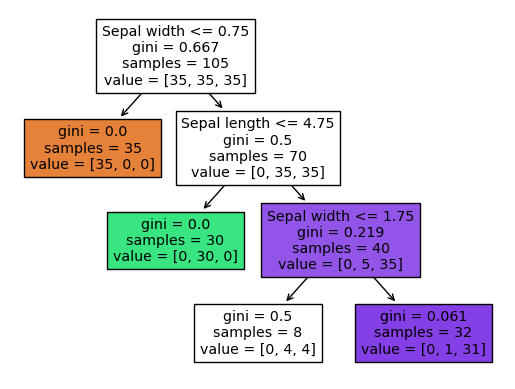

In [35]:
# from sklearn import tree

feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']

tree.plot_tree(tree_model1,
              feature_names=feature_names,
              filled=True)

plt.show();

## Combining multiple trees via **Random Forest**

- A random forest can be considered as an ensemble of decision trees. <u>***The idea behind a random forest is to average multiple (deep) decision trees that individually suffer from high variance[overfit decision trees] to build a more robust model that has a better generalization performance and is less susceptible to overfitting***</u>

- The random forest algorithm can be summarized in 4 simple steps:
    1. *Draw a random* **bootstrap** *sample size of n (randomly chosen n examples from the training dataset with replacement).*
    
    2. *Grow a decision tree from the bootstrap sample. At each node:*
    
        a. *Randomly select d features without replacement.*
        
        b. *Split the node using the feature that provides the best split according to the objective function, for instance, maximizing the Information Gain.*
        
    3. *Repeat steps 1-2 k times.*
    
    4. *Aggregate the prediction by each tree to assign the class lable by* **majority vote**.
    
    
- **We should note one slight modification in step 2 when we are training the individual decision trees: instead of evaluating all features to determine the best split at each node, we only consider a random subset of those.**

-----------------------------------------------------

### ***Hyperparameters in Random Forest***

- Although random forests don’t offer the same level of interpretability as decision trees, a big advantage of random forests is that we don’t have to worry so much about choosing good hyperparameter values. *We typically don’t need to prune the random forest since the ensemble model is quite robust to noise from averaging the predictions among the individual decision trees.*


- **The only parameter that we need to care about in practice is the number of trees, k, (step 3) that we choose for the random forest.** *Typically, the larger the number of trees, the better the performance of the random forest classifier at the expense of an increased computational cost.*


- Although it's less commen in practice, other hyperparameters of the random forest classifier that can be optimized——are the size n, of the bootstrap sample(step 1) and the number of features, d, that are rrandomly chosen for each split(step 2a), respectively.


- *Via the sample size, n, of the bootstrap sample, we control the bias-variance tradeoff of the random forest.* 


- Decreasing the size of the bootstrap sample increases the diversity among the individual trees since the probability that a particular training example is included in the bootstrap sample is lower. **Thus, shrinking the size of the bootstrap samples may increase the randomness of the random forest, and it can help to reduce the effect of overfitting.** <br>However, smaller bootstrap samples typically result in a lower overall performance of the random forest and a small gap between training and test performance, but a low test performance overall. 


- **Conversely, increasing the size of the bootstrap sample may increase the degree of overfitting.** Because the bootstrap samples, and consequently the individual decision trees, become more similar to one another, they learn to fit the original training dataset more closely. 


- In most implementations, including the ```RandomForestClassifier``` implementation in scikit-learn, ***the size of the bootstrap sample is chosen to be equal to the number of training examples in the original training dataset, which usually provides a good bias-variance tradeoff.***<br><br> **For the number of features, d, at each split**, we want to choose a value that is smaller than the total number of features in the training dataset. A reasonable default that is used in scikit-learn and other implementations is $d = \sqrt{m}$, **where m is the number of features in the training dataset.**

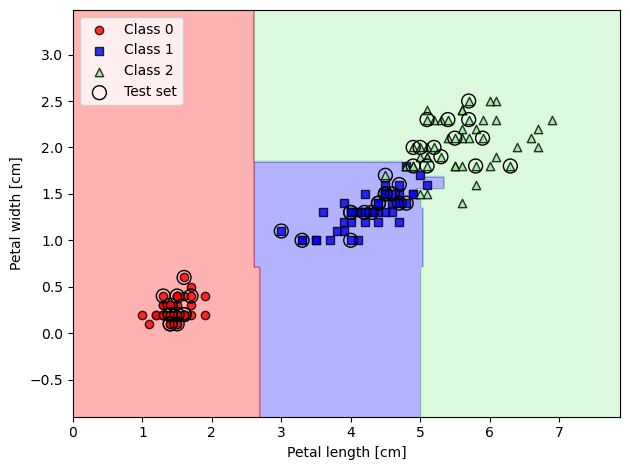

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25,
                               random_state=1,
                               n_jobs=2)

forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_2.png', dpi=300)
plt.show();




Using the preceding code, *we trained a random forest from 25 decision trees via the ```n_estimators``` parameter. By default, it uses the Gini impurity measure as a criterion to split the nodes.* 

Although we are growing a very small random forest from a very small training dataset, we used the ```n_jobs``` parameter for demonstration purposes, which allows us to parallelize the model training using multiple cores of our computer (here, two cores).

## <a href="https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6">***Do Decision Trees need Feature Scaling?***</a>

***Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.***

In [39]:
# Using feature scaling on decison tree algorithm.

# from sklearn.ensemble import RandomForestClassifier

# forest1 = RandomForestClassifier(n_estimators=25,
#                                random_state=1,
#                                n_jobs=2)

# forest1.fit(X_train_std, y_train)  

# plot_decision_regions(X_combined, y_combined, 
#                       classifier=forest1, test_idx=range(105, 150))

# plt.xlabel('Petal length [cm]')
# plt.ylabel('Petal width [cm]')
# plt.legend(loc='upper left')
# plt.tight_layout()
# #plt.savefig('figures/03_2.png', dpi=300)
# plt.show();

## **K-Nearest Neighbours (KNN)**

- **KNN is a typical example of a lazy learner. It is called “lazy” not because of its apparent simplicity, but because it doesn’t learn a discriminative function from the training data but memorizes the training dataset instead.**


- *The KNN algorithm is as:* 
    1. Choose the number of k and a distance metric 
    
    2. Find the k-nearest neighbors of the data record that we want to classify
    
    3. Assign the class label by majority vote
    
    
- Based on the chosen distance metric, the KNN algorithm finds the k examples in the training dataset that are closest (most similar) to the point that we want to classify. The class label of the data point is then determined by a majority vote among its k nearest neighbors.


----------------------------------------------------

### **Parametric versus non-parametric models**

- Machine learning algorithms can be grouped into parametric and non-parametric models. 
    - Using **parametric models**, we estimate parameters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore. ***Typical examples of parametric models are the perceptron, logistic regression, and the linear SVM.*** 
    
    - In contrast, **non-parametric models** can’t be characterized by a fixed set of parameters, and the number of parameters changes with the amount of training data. ***Two examples of non-parametric models that we have seen so far are the decision tree classifier/random forest and the kernel (but not linear) SVM.*** 

- KNN belongs to a subcategory of non-parametric models described as instance-based learning. **Models based on instance-based learning are characterized by memorizing the training dataset, and lazy learning is a special case of instance-based learning that is associated with no (zero) cost during the learning process.** 

-----------------------------------------------------

### **Advantages and disadvantages of memory-based approaches** 

- The **main advantage** of such a memory-based approach is that the classifier immediately adapts as we collect new training data. 

- However, the **downside** is that the computational complexity for classifying new examples grows linearly with the number of examples in the training dataset in the worst-case scenario—unless the dataset has very few dimensions (features) and the algorithm has been implemented using efficient data structures for querying the training data more effectively, like <a href="https://en.wikipedia.org/wiki/K-d_tree">k-d tree</a> and <a href="https://en.wikipedia.org/wiki/Ball_tree">ball tree</a>, which are both supported in scikit-learn. Furthermore, next to computational costs for querying data, large datasets can also be problematic in terms of limited storage capacities.

- Recent examples of using nearest neighbor methods include predicting properties of pharmaceutical drug targets

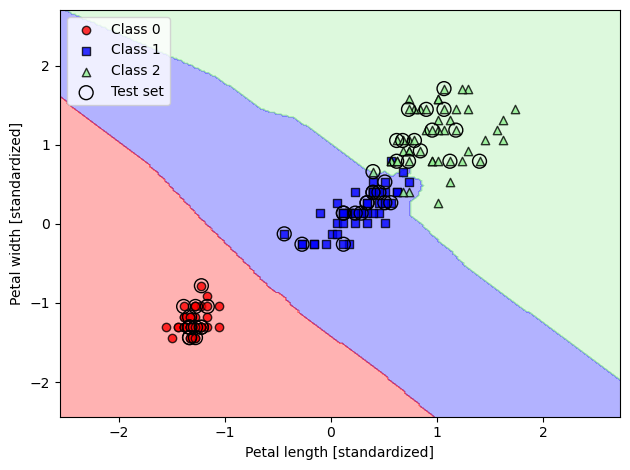

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,
                          p=2,
                          metric='minkowski')

knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_24_figures.png', dpi=300)
plt.show();

### **Resolving ties** 

**In the case of a tie, the scikit-learn implementation of the KNN algorithm will prefer the neighbors with a closer distance to the data record to be classified. If the neighbors have similar distances, the algorithm will choose the class label that comes first in the training dataset.**

-------------------------------------------------------------------

- ***The right choice of k is crucial to finding a good balance between overfitting and underfitting.*** 

- We also have to make sure that we choose a distance metric that is appropriate for the features in the dataset.

- However, if we are using a Euclidean distance measure, it is also important to standardize the data so that each feature contributes equally to the distance. 

- The ```minkowski``` distance that we used in the previous code is just a generalization of the Euclidean and Manhattan distance, which can be written as follows:$$d\left(x^{i}, x^{j}\right) = \sqrt[p]{\sum_{k}|x_{k}^{i} - x_{k}^{j}|^{p}}$$```p=2``` $\rightarrow$ Euclidean distance<br>```p=1``` $\rightarrow$ Manhattan distance

- **Lastly, it is important to mention that KNN is very susceptible to overfitting due to the curse of dimensionality.** 

----------------------------------------------------------------------
### ***Curse of Dimensionality***
- The **curse of dimensionality** $\rightarrow$ ***describes the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset. We can think of even the closest neighbors as being too far away in a high-dimensional space to give a good estimate.*** 

- We discussed the concept of regularization in the section about logistic regression as one way to avoid overfitting. ***However, in models where regularization is not applicable, such as decision trees and KNN, we can use feature selection and dimensionality reduction techniques to help us to avoid the curse of dimensionality.*** This will be discussed in more detail in the next two chapters.

## **Summary**

In this chapter, you learned about many different machine learning algorithms that are used to tackle linear and nonlinear problems. 

- ***You have seen that decision trees are particularly attractive if we care about interpretability.***

- ***Logistic regression is not only a useful model for online learning via SGD, but also allows us to predict the probability of a particular event.*** 

- ***Although SVMs are powerful linear models that can be extended to nonlinear problems via the kernel trick, they have many parameters that have to be tuned in order to make good predictions.***

- ***In contrast, ensemble methods, such as random forests, don’t require much parameter tuning and don’t overfit as easily as decision trees, which makes them attractive models for many practical problem domains.***

- ***The KNN classifier offers an alternative approach to classification via lazy learning that allows us to make predictions without any model training, but with a more computationally expensive prediction step.***

- *However, even more important than the choice of an appropriate learning algorithm is the available data in our training dataset. No algorithm will be able to make good predictions without informative and discriminatory features.*

***Reference:***<br>
***Raschka, Sebastian; Liu, Yuxi (Hayden); Mirjalili, Vahid. Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt Publishing.*** 